**Выявление закономерностей, определяющих успешность игры для планирования рекламных кампаний**

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель**:

-Выявление закономерностей определяющих успешность игр,что позволит сделать ставку на потенциально популярный продукт и спланировать  рекламные кампании.  
-Разработка принципов работы с данными для принятия решений по продукту

**План исследования**:  

1.Предобработка данных для анализа: работа с пропусками и типами данных  
2. Исследовательский анализ:  
 2.1 Количество игр  в разные годы.  
 2.2 Продажи по платформам: платформы с наиболшими суммарными продажами и распределение продаж по годам. Жизненный цикл платформ.   
 2.3 Выбор потенциально прибыльных платформ.     
 2.4 График «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
 2.5 Влияние оценок и отзывов критиков и пользователей на продажи внутри одной платформы.   
 2.6 Распределение игр по жанрам. Популярные жанры  
 2.7 Портрет пользователя региона: Европа, Америка и Япония:  
 2.7.1 Топ 5 платформ. 
 2.7.2 Топ 5 жанров  
 2.7.3 Влияние рейтинга ESRB на продажи  
 3. Проверка гипотез:  
 3.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
 3.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Описание данных**  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).



In [1]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# открытие файла
try:
    data = pd.read_csv('/Users/marinakravets/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# вывод на экран первых 10 срок
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# изучение данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо изменить заголовки на строчные, изменить типы данных, работа с пропуками

Проверим есть ли дублирующие данные

In [5]:
# выведем сумму дубликатов
data.duplicated().sum()

0

## Предобработка данных

In [6]:
# Заголовки столбцов к строчному регистру
data = data.rename(columns={
    'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre',
    'NA_sales':'na_sales','EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
    'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'
})

Изменение типов данных. Год выпуска изменим на целочисленный. Оценки юзеров с object переведем на float

In [7]:
#changing data types
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
# оценим корректность изменения типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
#study the data of tbd
data['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

2424 строки с tbd - формат заполнения пропусков данных. Заменим оставшиеся NAN на tbd, т.е оценка не проставлена и будем учитывать эти данные для анализа

In [10]:
#заменим пропуски в оценках пользователей на -1
data['user_score'] = data['user_score'].fillna(-1)

In [11]:
# проверим остались ли пропуски
data['user_score'].isna().sum()

0

Поступим аналогичным образом с пропусками в оценках критиков: заменим NAN на -1 - оценки нет

In [12]:
# замена пропусков оценок критиков на -1
data['critic_score'] = data['critic_score'].fillna(-1)

In [13]:
# проверка 
data['critic_score'].isna().sum()

0

In [14]:
#пропуски в рейтингах
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

*EC	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.*  

*E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.*

*E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.*  

*T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.*  

*M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. * 

*AO	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства.*  

*RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.*

Заменим пропуски в rating на RP - категория не присвоена. так мы будем учитывать данные с пропусками в анализе.

In [15]:
#заменим пропуски на RP- статус не определен
data['rating'] = data['rating'].fillna('no_ESRB')

In [16]:
# посмотрим остались ли пропуски
data['rating'].isna().sum()

0

Пропуски. name, genre - по 2 пропуска - имена не важны- оставлю

Год выпуска - пропусков немного, уберу из анализа, тк год выпуска важен для анализа

In [17]:
# убираем из датасета пропуски в year_of_release
data = data[data['year_of_release'].notnull()]

Добавим колонку с общими продажами по миру

In [18]:
# adding column 'total_sales'
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<font color='Blue'>ПРИЧИНЫ ПРОПУСКОВ
В Японии оценка контента не требуется законом.
Таже причиной пропусков в оценках может быть, то что игра еще не была оценена ни пользователями, ни критиками, ни организациями</font>

## Исследовательский анализ данных

### Количество игр в разные годы. 

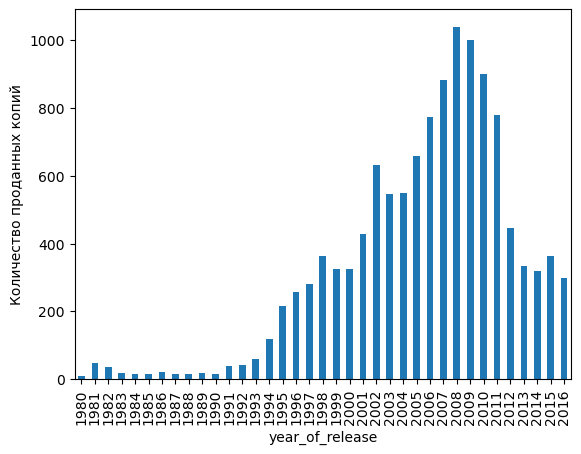

In [19]:
data.groupby('year_of_release')['name'].nunique().plot.bar(ylabel = 'Количество проданных копий')
plt.show()

Исходя из диаграммы года 1980-1994 непоказательны, тк рынок  была в начале своего развития и игр выпускалось очень мало.
Уберем из анализа эти года


In [20]:
data = data.loc[(data['year_of_release']>1995)&(data['year_of_release']<=2016)]

### Платформы с наибольшими суммарными продажами

In [21]:
# сгруппируем по платформе и отсортируем в порядке возрвстания по общим продажам
data_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# переведем в dataFrame
data_platform = data_platform.to_frame().reset_index()
# расчитаем долю продаж платформы от общих продаж
data_platform['percent'] = data_platform['total_sales']/data_platform['total_sales'].sum()
# добавим столбец с кумулятивной суммой долей
data_platform['cum_percent'] = data_platform['percent'].cumsum()
data_platform

,platform,total_sales,percent,cum_percent
0,PS2,1233.56,0.152918,0.152918
1,X360,961.24,0.119160,0.272078
2,PS3,931.34,0.115454,0.387532
3,Wii,891.18,0.110475,0.498007
4,DS,802.76,0.099514,0.597521
5,PS,685.59,0.084989,0.682511
6,PS4,314.14,0.038942,0.721453
7,GBA,312.88,0.038786,0.760239
8,PSP,289.53,0.035892,0.796131
9,3DS,257.81,0.031959,0.828090


In [22]:
# присвоим категорию ABC для платформ
data_platform['category'] = data_platform['cum_percent'].apply(lambda x:"A" if x<=0.8 else "B" if x<0.95 else "C") 

In [23]:
data_platform

,platform,total_sales,percent,cum_percent,category
0,PS2,1233.56,0.152918,0.152918,A
1,X360,961.24,0.119160,0.272078,A
2,PS3,931.34,0.115454,0.387532,A
3,Wii,891.18,0.110475,0.498007,A
4,DS,802.76,0.099514,0.597521,A
5,PS,685.59,0.084989,0.682511,A
6,PS4,314.14,0.038942,0.721453,A
7,GBA,312.88,0.038786,0.760239,A
8,PSP,289.53,0.035892,0.796131,A
9,3DS,257.81,0.031959,0.828090,B


In [24]:
# добавляем столбец с критериями из data_platform в data
data = pd.merge(data,data_platform,on=['platform'], how='left')

In [25]:
# переименуем столбцы
data = data.rename(columns={'total_sales_x':'total_sales'})

In [26]:
# удалим ненужные столбцы
data.drop(['total_sales_y','percent','cum_percent'], axis=1, inplace=True)

In [27]:
#вывод таблицы
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,A
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,A
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,A
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_ESRB,31.38,C
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,A


In [28]:
# сгруппируем общие продажи платформ категории А по годам
data_years = data[data['category'] == "A"].pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc='sum')
data_years = data_years.reset_index()
data_years

,platform,year_of_release,total_sales
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.94
4,DS,2008,145.31
...,...,...,...
83,X360,2012,99.74
84,X360,2013,88.58
85,X360,2014,34.74
86,X360,2015,11.96


In [29]:
# список топ 8 платформ категории А
p = list(data_years['platform'])
top_platforms=[]
for index in p:
    if index not in top_platforms:
        top_platforms.append(index)
top_platforms        

['DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360']

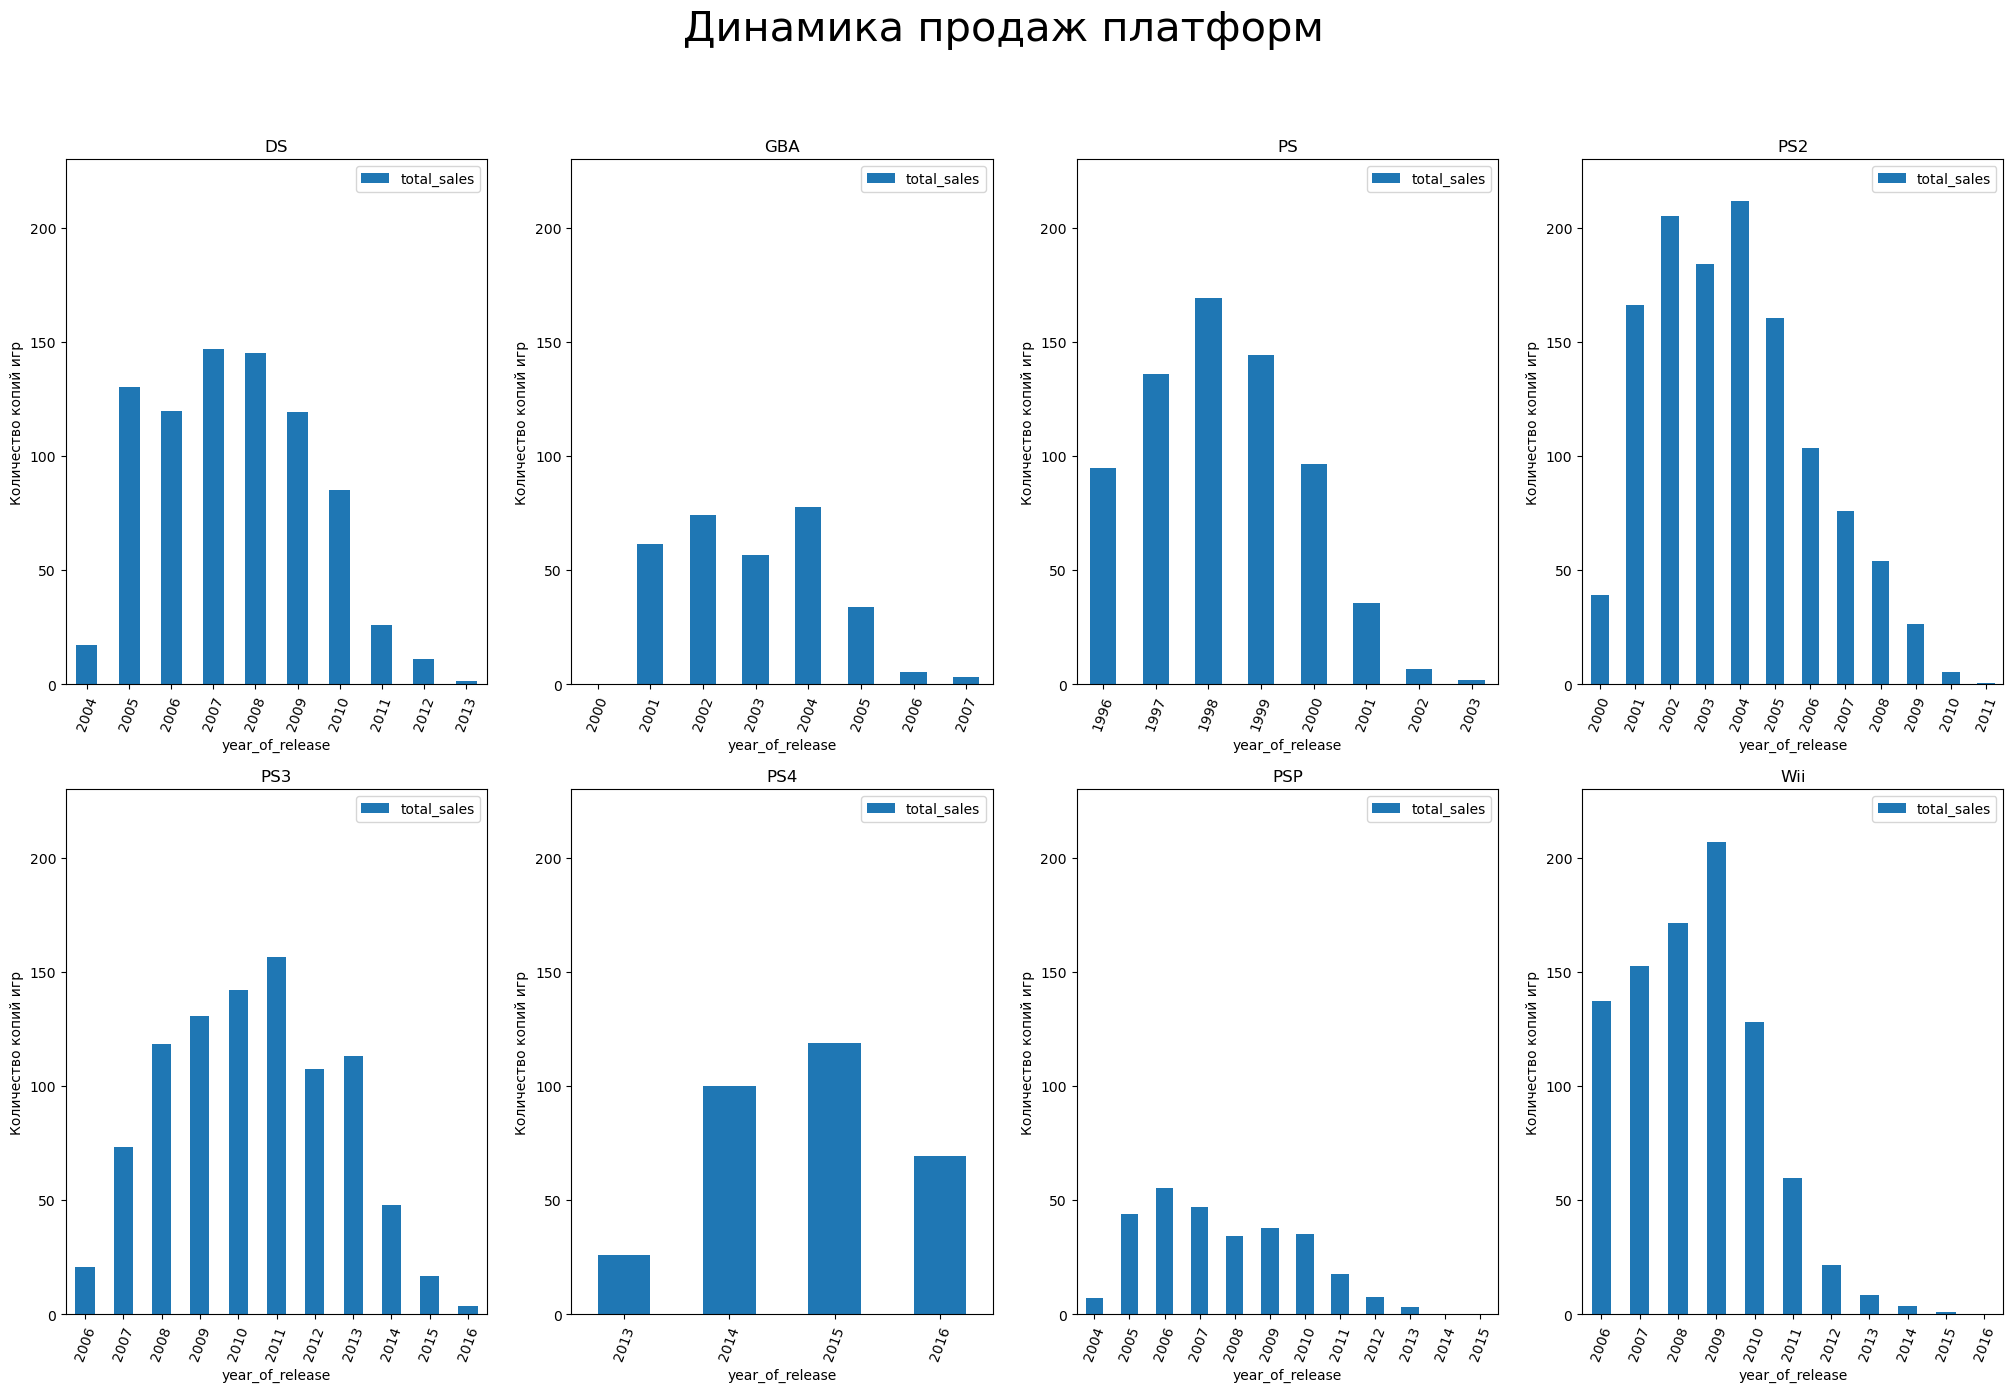

In [30]:
# создадим функцию для построения диаграммы продаж по годам платформ категории А
def top(top_platforms, ax):
    temp = data_years[data_years['platform'] == top_platforms]\
        .pivot_table(index='year_of_release', values = 'total_sales', aggfunc='sum')
    temp.index = temp.index.astype(int)
 
    temp.plot(ax=ax,
    kind='bar',
    subplots=True,
    legend=True,
    ylabel='Количество копий игр')
    ax.set(ylim = [0, 230],
          title=top_platforms)
    ax.tick_params(axis='x', labelrotation=70, labelsize=10)
 
 

#создаём 8 графиков с 2 строками и 4 столбцами

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25, 15))
fig.suptitle('Динамика продаж платформ',size=30)

#проходимся циклом по 2 строкам и 4 столбцам
num = 0
for i in range(2):
    for j in range(4):
        top(top_platforms[num], ax[i, j])
        num += 1
    

**Средний срок активных продаж на  платформах 5-7 лет, затем платформа теряет свои позиции и уступает место другим платформам.
Будем брать для дальнейшего анализа и прогноза срок 5 лет - срок роста и стабильных продаж**


### Потенциально прибыльные платформы

Посмотрим на все платформы существующие последние 5 лет.Таким образом анализируем период 2012-2016

In [31]:
# делаем срез данных по годам не ниже 2012г
data_act = data[data['year_of_release']>= 2012]
data_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,category
13,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,A
17,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,A
25,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_ESRB,14.63,A
27,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_ESRB,14.60,B
28,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,A


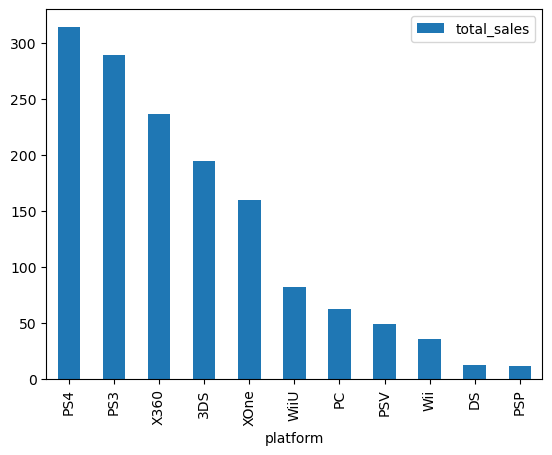

In [32]:
# посторим столбчатую диаграмму по продажам на платформах
data_act.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).plot.bar();


Посмотрим на платформе в динамике, возможно платформы с небольшими продажами имеют тренд к повышению продаж

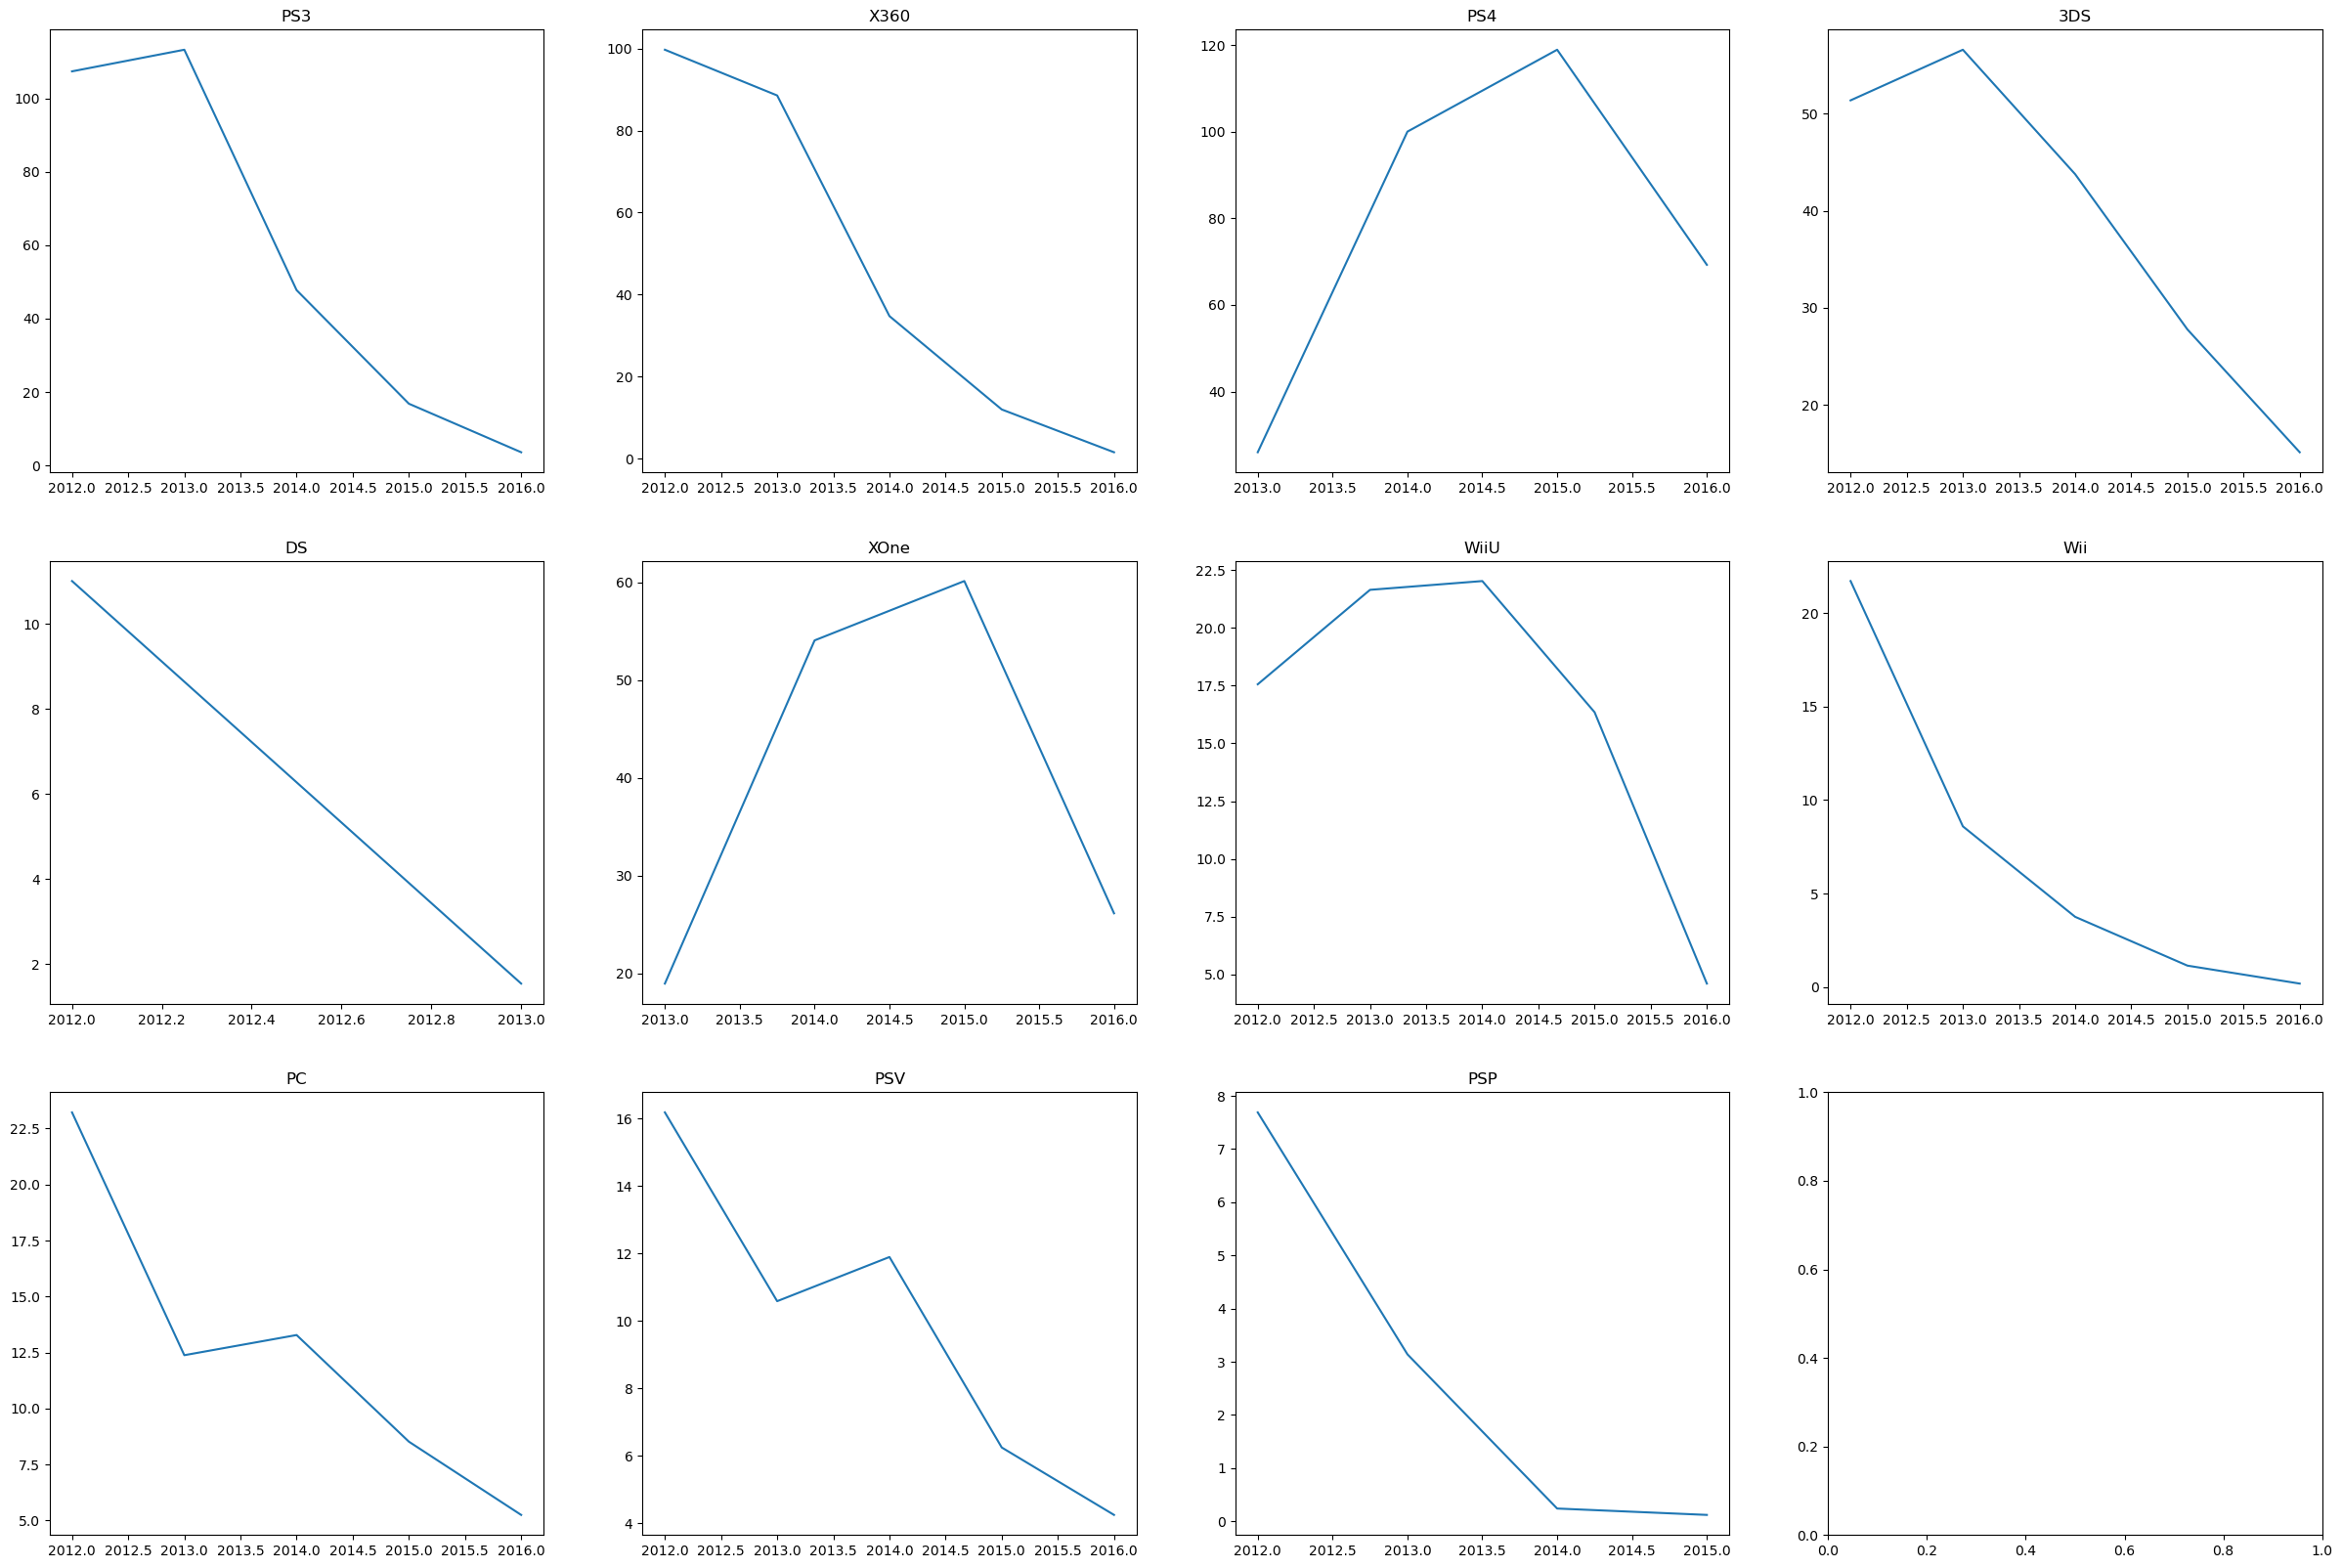

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))
# Создать итератор, который позволит нам проходиться циклом последовательно по subplots
subplots = cycle(ax.flat)
for p in data_act['platform'].unique():
    #выбираем следующий по порядку subplot
    subplot = next(subplots)    
    grafic = data_act[data_act['platform']==p].groupby('year_of_release')['total_sales'].sum()
    subplot.plot(grafic)
    subplot.set(title=p) 

В 5 лидеров были:  
PS3 - пик продаж 2013-тренд на снижение.   
PS4 - пик продаж 2015 - тренд на повышение.    
X360 - пик продаж 2012- тренд на снижение.  
3DS - пик продаж в 2013 - снижение.  
XONE- пик продаж 2015 - тренд на повышение.   
Платформы, которые не входили в 5 лидеров - не показывают тренда на повышение. 

**Таким образом,наиболее перспективными кажутся PS4 - платформа на стадии роста и активных продаж и возможно XOne- к которой можно присмотреться, когда будут итоги года за 2016г. Возможно у нее есть перспектива** 


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [34]:
# сформируем сводную таблицу по продажам платформ 
data_act.pivot_table(index='platform', values='total_sales', aggfunc='sum')

,total_sales
platform,
3DS,194.61
DS,12.55
PC,62.65
PS3,288.79
PS4,314.14
PSP,11.19
PSV,49.18
Wii,35.37
WiiU,82.19


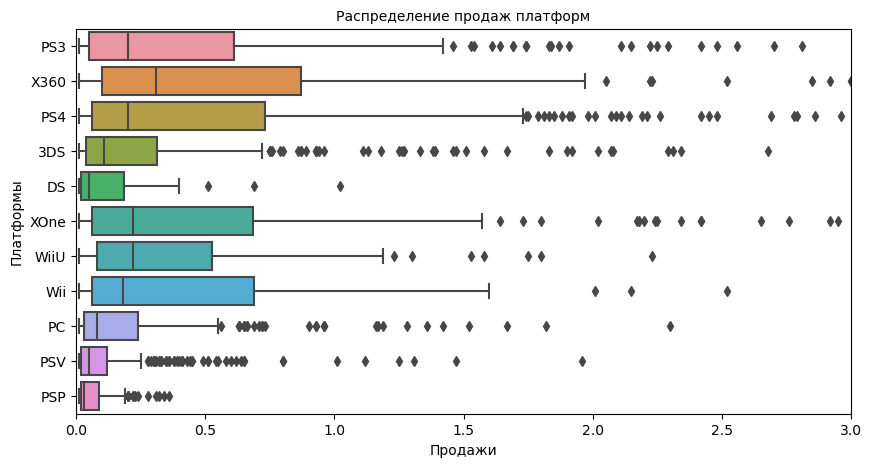

In [35]:
#нарисуем график для лучшего отображения медианы, задав xlim
fig = plt.figure(figsize=(10,5))

boxplot=sns.boxplot(y='platform',x='total_sales', data=data_act)
plt.xlim(0,3)
boxplot.axes.set_title("Распределение продаж платформ", fontsize=10)
boxplot.set_ylabel("Платформы", fontsize=10)
boxplot.set_xlabel("Продажи", fontsize=10);

Глядя на данную диаграмму можно сделать вывод, что медиана у всех платформ стремится к нижнему краю и из чего можно сделать вывод, что в продаж платформ преобладают игры с небольшими продажами и ограниченным количеством популярных игр, продажи которых на графике можно оценить как выбросы.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. 

In [36]:
# посмотрим на общую корреляцию по продажам всех платформ от оценкок критиков и пользователей
data_act[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.248010,0.182361
critic_score,0.248010,1.000000,0.840881
user_score,0.182361,0.840881,1.000000


Очень слабая прямая корреляция продаж от оценок критиков и оценок пользователей 0,25 и 0,18 соотвественно

Оценим корреляцию продаж 4 топовых платформ PS4 по отношению к оценкам пользователей

PS4              total_sales  user_score
total_sales     1.000000   -0.031957
user_score     -0.031957    1.000000
----------------------------------------
PS3              total_sales  user_score
total_sales     1.000000   -0.005144
user_score     -0.005144    1.000000
----------------------------------------
XOne              total_sales  user_score
total_sales     1.000000   -0.068925
user_score     -0.068925    1.000000
----------------------------------------
X360              total_sales  user_score
total_sales     1.000000    0.006164
user_score      0.006164    1.000000
----------------------------------------


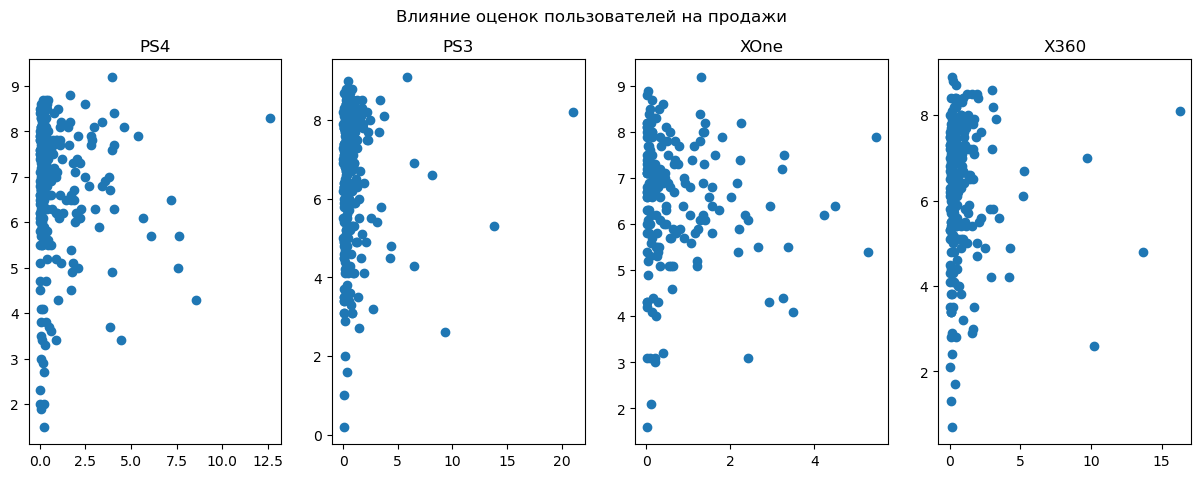

In [37]:
# оценим корреляцию топ платформы PS4 PS3 XOne WiiU  от оценок пользователей
platforms = ['PS4','PS3','XOne','X360']
fig, ax = plt.subplots(1, len(platforms), figsize=(15,5))
plt.suptitle("Влияние оценок пользователей на продажи")
for i, p in enumerate(platforms):
    df = data_act[(data_act['platform']==p)&(data_act['user_score']>-1)]
    print(p,df[['total_sales','user_score']].corr())
    print('-'*40)
    ax[i].scatter(x='total_sales', y='user_score',data=df)
    ax[i].set_title(p)
plt.show()     

Анализ топовых платформ показал слабейшую отрицательную корреляцию между продажами и оценками пользователей

Оценим корреляцию продаж 4 топовых платформ PS4 по отношению к оценкам критиков

Корреляция между продажами и оценками критиков 
PS4               total_sales  critic_score
total_sales      1.000000      0.406568
critic_score     0.406568      1.000000
----------------------------------------
PS3               total_sales  critic_score
total_sales      1.000000      0.331497
critic_score     0.331497      1.000000
----------------------------------------
XOne               total_sales  critic_score
total_sales      1.000000      0.416998
critic_score     0.416998      1.000000
----------------------------------------
X360               total_sales  critic_score
total_sales      1.000000      0.360573
critic_score     0.360573      1.000000
----------------------------------------


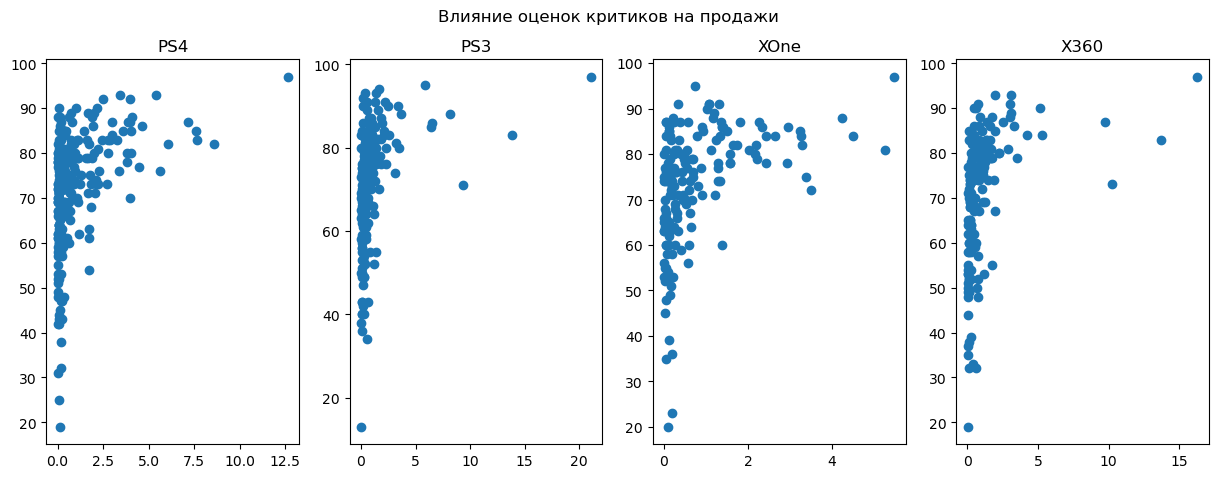

In [38]:
# оценим корреляцию топ платформы PS4 PS3 XOne WiiU  от оценок пользователей
platforms = ['PS4','PS3','XOne','X360']
fig, ax = plt.subplots(1, len(platforms), figsize=(15,5))
plt.suptitle("Влияние оценок критиков на продажи")
print('Корреляция между продажами и оценками критиков ')
for i, p in enumerate(platforms):
    df = data_act[(data_act['platform']==p)&(data_act['critic_score']>-1)]
    
    print(p,df[['total_sales','critic_score']].corr())
    print('-'*40)
    ax[i].scatter(x='total_sales', y='critic_score',data=df)
    ax[i].set_title(p)
plt.show()     

Анализ продаж топовых платформ показал одинаковую картину: слабую положительную корреляцию ( в среднем 0,4) между продажами и оценками критиков. 

Из диаграмм видна также слабая корреляция от оценок критиков и корреляция между продажами и оценками пользователей очень слаба. Оценки влияют на продажи, но незначительно.

### Общее распределение игр по жанрам. 

In [39]:
data_act.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

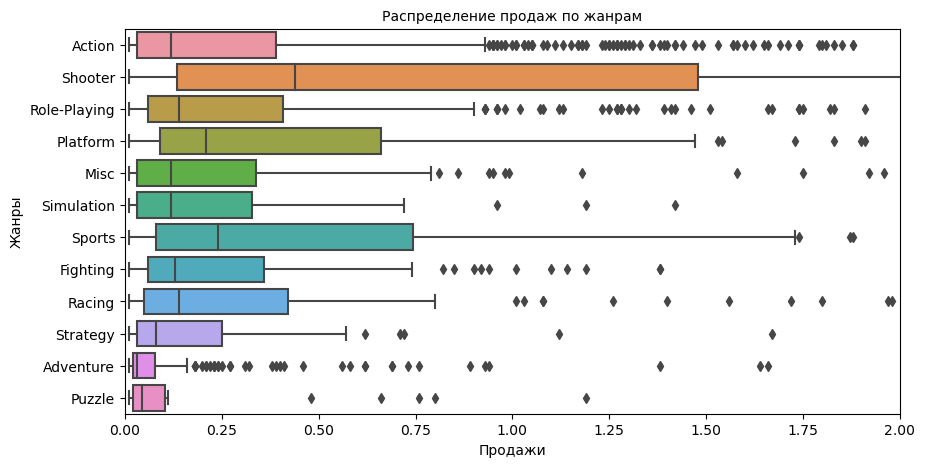

In [40]:
#нарисуем диаграмму размаха для продаж по жанрам
fig = plt.figure(figsize=(10,5))

boxplot=sns.boxplot(y='genre',x='total_sales', data=data_act)
plt.xlim(0,2)
boxplot.axes.set_title("Распределение продаж по жанрам", fontsize=10)
boxplot.set_ylabel("Жанры", fontsize=10)
boxplot.set_xlabel("Продажи", fontsize=10);

Самые высок стабильные продажи показывает жанр Shooter( средние продажи 0,4млн), Sports(0,24), Platform (0,2), Role-Playing(0,14).  
Самые маленькие продажи по играм в стиле Adventure (0,03млн)и Puzzle(0,045)

### Портрет пользователя каждого региона

Для анализа типичного пользователя в регионах eu-Европа, na-Северная Америка и jp-Япония возьмем актуальные данные за 2012-2016

#### Топ-5 платформ по регионам

Посмотрим какие платформы популярны во всем мире

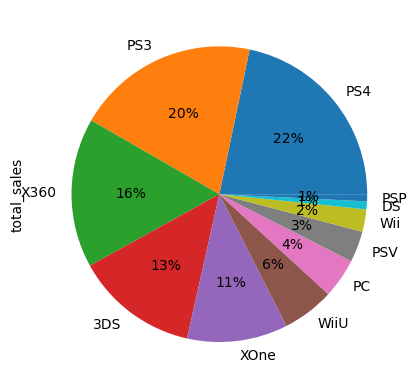

In [41]:
# сформируем сводную таблицу по платформам по total_sales
data_act.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.0f%%')
plt.show()

Платформа PS4 занимает 22% мировых продаж, PS3 - 20%, X360-16%, 3DS-13%, Xone - 11%

Посмотрим на платформы в разрезе интересующих нас регионов Европа -eu_sales, Северная Америка- na_sales, Япония - jp_sales

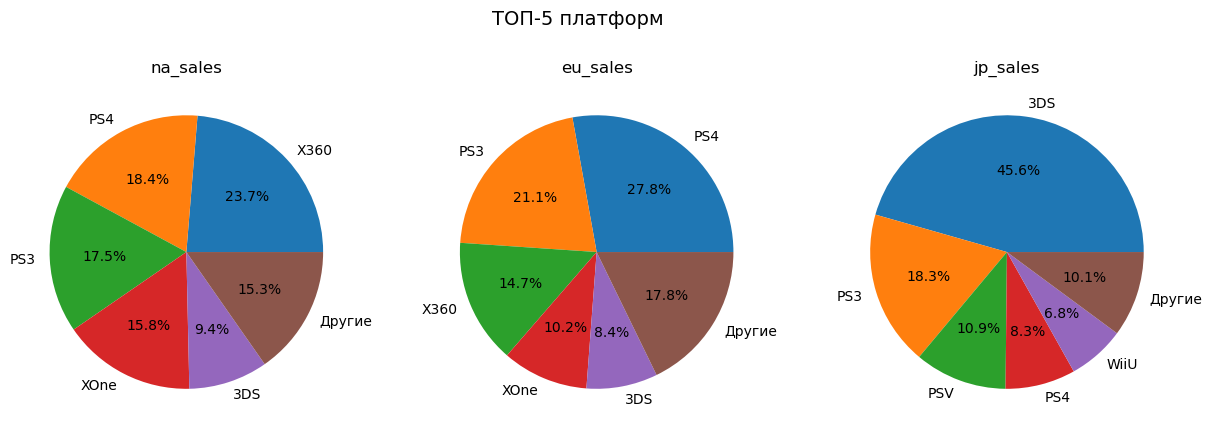

In [42]:
regions_sales = ['na_sales','eu_sales','jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data_act.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'],autopct='%1.1f%%')
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ', fontsize=14)
plt.show()

В топ 5 платформ в Американском регионе входят: X360 (23,7%), PS4(18%),PS3(17,5%), Xone(15,8%), 3DS (9,4%)

 В топ5 платформ в Европейском регионе: PS4 (27,8%), PS3 (21%), X360 (14,7%), Xone (10,2%), 3DS (8,4%)

В топ5 платформ в Японии: почти половину рынка занимает платформа 3DS (45,6%),PS3 (18,3%),PSV (10,9%), PS4 (8,3%),WiiU (6,8%).

Можно сделать вывод, что предпочтения по плаформам в na и eu-регионах похожи: в 5 лидеров одни и теже платформы ( PS4, Xone,PS3,X360, 3DS).    
Предпочтения в jp-регионе отличаются от других регионов: в 5 лидеров платформ только 2 платформы, которые лидируют на других территориях (3DS, PS3) и 3 платформы PSV, WiiU, которые на территориях eu и na непопулярны.  
Особой популярностью на рынке jp пользуется платформа 3DS, занимающая 45,6% рынка jp, которая в регионах eu и  na занимает только 9 и 8% соответственно.  
Главный лидер американского рынка платформа X360 (24% рынка), на европейском рынке платформа PS4(28%), на японском рынке 3DS (46%)
Главные аутсайдер во всех регионах - платформа PSP

#### Топ-5 жанров по регионам

Посмотрим на жанровые предпочтения по всему миру

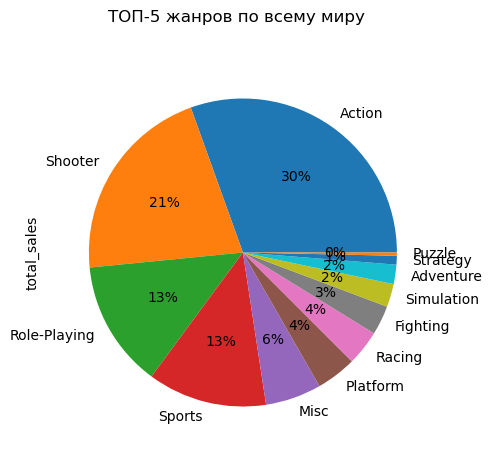

In [54]:
# сформируем сводную таблицу по жанрам по total_sales
data_act.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(5,5))
plt.suptitle('ТОП-5 жанров по всему миру', fontsize=12);

30% от мировых продаж занимают игры в жанре Action, 21% -Shooter, 13%-Sports, 13%- Role_Playing, 6% - Misc

Оценим жанровые предпочтения в регионах Европа -eu_sales, Северная Америка- na_sales, Япония - jp_sales

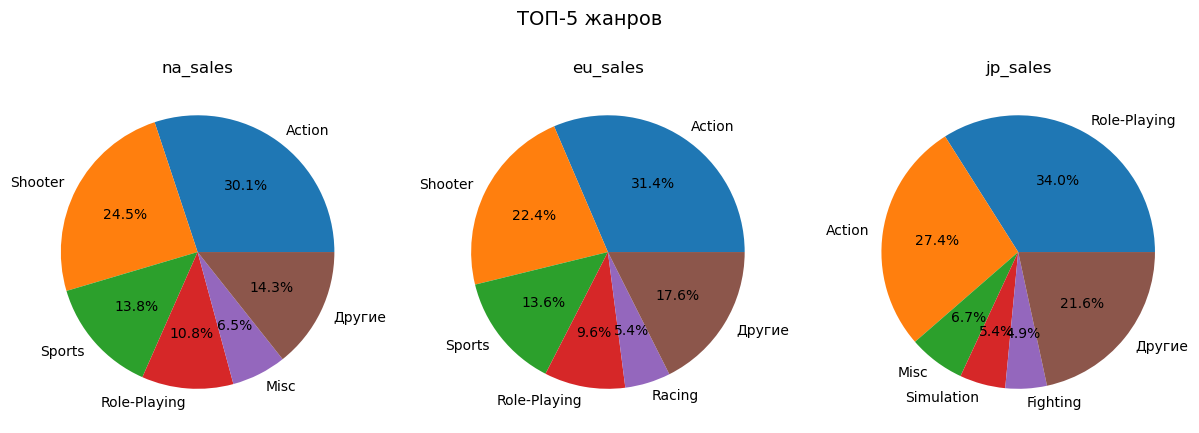

In [44]:
#построим диаграммы долей продаж по жанрам в разных регионах
regions_sales = ['na_sales','eu_sales','jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data_act.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['genre'],autopct='%1.1f%%')
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров', fontsize=14)
plt.show()

На первом месте по продажам в eu регионе: игры в стиле Action 31%, Shooter 22,4%, Sports 13,6%, Role-Playing 9,6%, Racing 5,4%

На лидирующие продажи в na регионе занимают: Action 30%, Shooter 24,5%, Sports 13,8%, Role-Playing 10,8%, Misc 6,5%

На первом месте в jp регионе: Role-Playing 34%, Action 27,4%, Fighting 4,9% Misc 6,7%, Simulation 5,4%

Игры в стиле Action, Shooter, Sports,Role_Playing,Misc - одинаково популярны в регионах eu и na. Даже пропорции в продажах по жанрам примерно одинаковы  
Вкусы жителей jp-региона отличаются, на первом месте по популярности игры в жанре Role-Playing и Action, но вместо Sport в Японии любят играть в Fighting и Simulation, хотя и входит в 5 лидеров, но занимает долю только в 5% от рынка.  

Хотя есть игры которые одинаково непопулярны во всех регионах: например, Puzzle, Strategy

**Вывод: самые популярные игры в жанрах Role-Playing, Action, занимающие долю около 50% по всему миру**

 #### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

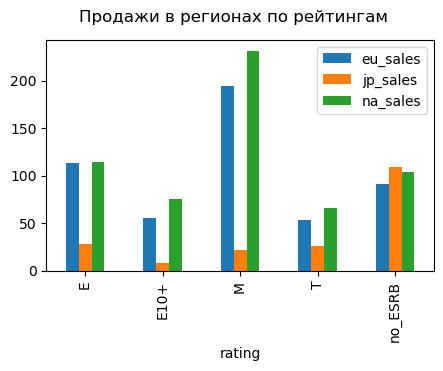

In [58]:
#рейтирг в  разбивке по регионам
data_act.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar',figsize=(5,3))
plt.suptitle("Продажи в регионах по рейтингам");

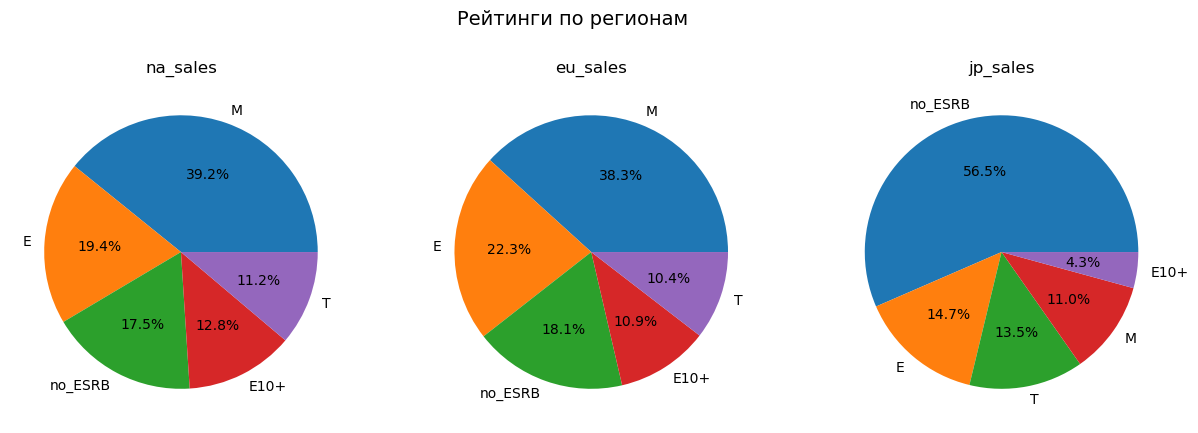

In [46]:
regions_sales = ['na_sales','eu_sales','jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data_act.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    ax[i].pie(region_platform[region], labels=region_platform['rating'],autopct='%1.1f%%')
    ax[i].set_title(region)
plt.suptitle('Рейтинги по регионам', fontsize=14)
plt.show()

Опять прослеживается похожесть рынков Америки и Европы.   
На первом месте по продажам игры в категории М - для лиц старше 17 лет.  
На втором месте игры E, для всех возрастных категорий,на третьем месте игры, которым рейтинг еще не присвоен (no_ESRB).  

На рынке Японии больше половины игр 56,5% без рейтинга ESRB,  на 2-м месте игры для всех возрастных категорий, на 3-м месте игры для лиц старше 13 лет.   
Могу сделать вывод, что влияние рейтинга на продажи есть.

## Гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC 

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: средние оценки (user_score) платформ "Xone" = средние оценки  (user_score) платформы PC 

H_a: средние оценки (user_score) платформ "Xone" ≠ средние оценки  (user_score) платформы PC

alpha = 0.05 - уровень статистической значимости.Общепринятые пороговые значения — 5% и 1%.
p-value - Это вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна

In [47]:
xone = data_act[(data_act['platform']=='XOne')&(data_act['user_score']>0)]['user_score']
pc = data_act[(data_act['platform']=='PC')&(data_act['user_score']>0)]['user_score']
print(xone.mean())
print(pc.mean())

6.52142857142857
6.428640776699027


In [48]:
results = st.ttest_ind(xone,pc,equal_var=False)

alpha = 0.05
print("Вероятность получить наблюдаемый  результат при условии, что нулевая гипотеза верна ", results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue>alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
        print('Отвергаем нулевую гипотезу')

Вероятность получить наблюдаемый  результат при условии, что нулевая гипотеза верна  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Делаем вывод, что нулевая гипотеза верна и средние пользовательские рейтинги платформ Xbox One и PC примерно равны**

### Средние пользовательские рейтинги жанров Action  и Sports 

Проверка гипотезы: средние пользовательские рейтинги жанров Action и  Sports разные

H_0: средние оценки (user_score) жанра Action = средние оценки (user_score) жанра Action  

H_a: средние оценки (user_score) жанра Action ≠ средние оценки (user_score) жанра Action   

alpha = 0.05

In [49]:
action = data_act[(data_act['genre']=='Action')&(data_act['user_score']>0)]['user_score']
sports = data_act[(data_act['genre']=='Sports')&(data_act['user_score']>0)]['user_score']
print(action.mean())
print(sports.mean())

6.825047801147237
5.455897435897437


In [50]:
results = st.ttest_ind(action,sports,equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print("Вероятность получить наблюдаемый  результат при условии, что нулевая гипотеза верна ",results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue>alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
        print('Отвергаем нулевую гипотезу')

Вероятность получить наблюдаемый  результат при условии, что нулевая гипотеза верна  4.24307776572644e-20
Отвергаем нулевую гипотезу


**Таким образом можно сделать вывод, что средние оценки пользователей жанра Action не равны средним оценкам пользователей  жанра Sports** 

## Вывод

Средний срок активных продаж на платформах 5-7 лет, затем платформа теряет свои позиции и уступает место другим платформам.
В портфеле платформ преобладают игры с небольшими продажами и ограниченным количеством суперпопулярных игр.

Главный лидер европейского и американского рынка - платформа PS4 45% 
Особой популярностью на рынке jp пользуется платформа 3DS, занимающая 49% рынка jp
Главные аутсайдер во всех регионах - платформа PSP (устарела и жизненный цикл близок к завершению)


Игры в стиле Action, Shooter, Sports,Role_Playing,Misc - одинаково популярны в регионах eu и na.
Вкусы жителей jp-региона отличаются, на первом месте по популярности игры в жанре Role-Playing и Action
Хотя есть игры которые одинаково непопулярны во всех регионах: например, Puzzle, Strategy

Вывод: самые популярные игры в жанрах Role-Playing, Action, занимающие долю около 50% по всему миру 
На рынках Европы и Америки на первом месте по продажам игры в категории М - для лиц старше 17 лет.   
На рынке Японии больше половины игр 56,5% без рейтинга ESRB

**Необходимо разделить стратегии по отношению к рынкам Америки и Европы и Японии:** 

*Для рынка Европы и Америки* стоит уделить особое внимание платформе PS4, жанрам в стиле Action и Shooter, с возрастной категорией для лиц старше 17лет.(рейтинг ESRB)
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.  

*Для рынка Японии* перспективной кажется платформа 3DS, игре в жанре Role-Playing.В Японии оценка контента не требуется законом, но большинство коммерческих издателей видеоигр придерживаются саморегулирования отрасли. Производители консолей требуют от издателей видеоигр, чтобы игры оценивались CERO.  
При выборе стратегии не стоит обращать внимание на отзывы потребителей, но имеет место слабая корреляция продаж на отзывы критиков


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-игр-в-разные-годы." data-toc-modified-id="Количество-игр-в-разные-годы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество игр в разные годы.</a></span></li><li><span><a href="#Платформы-с-наибольшими-суммарными-продажами" data-toc-modified-id="Платформы-с-наибольшими-суммарными-продажами-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Платформы с наибольшими суммарными продажами</a></span></li><li><span><a href="#Потенциально-прибыльные-платформы" data-toc-modified-id="Потенциально-прибыльные-платформы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Потенциально прибыльные платформы</a></span></li><li><span><a href="#График-«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам." data-toc-modified-id="График-«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>График «ящик с усами» по глобальным продажам игр в разбивке по платформам.</a></span></li><li><span><a href="#Влияние-на-продажи-внутри-одной-популярной-платформы-отзывов-пользователей-и-критиков." data-toc-modified-id="Влияние-на-продажи-внутри-одной-популярной-платформы-отзывов-пользователей-и-критиков.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.</a></span></li><li><span><a href="#Общее-распределение-игр-по-жанрам." data-toc-modified-id="Общее-распределение-игр-по-жанрам.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Общее распределение игр по жанрам.</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Топ-5-платформ-по-регионам" data-toc-modified-id="Топ-5-платформ-по-регионам-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Топ-5 платформ по регионам</a></span></li><li><span><a href="#Топ-5-жанров-по-регионам" data-toc-modified-id="Топ-5-жанров-по-регионам-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Топ-5 жанров по регионам</a></span></li><li><span><a href="#Влияет-ли-рейтинг-ESRB-на-продажи-в-отдельном-регионе?" data-toc-modified-id="Влияет-ли-рейтинг-ESRB-на-продажи-в-отдельном-регионе?-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</a></span></li></ul></li></ul></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Гипотезы</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action--и-Sports" data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action--и-Sports-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action  и Sports</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>